#Learning to handle missing datasets

In [2]:
import seaborn as sns

In [3]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
#check for missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#checking the missing percentage of rows and columns to decide how to handle them 
#if the missing percentage of row is 5-10% we can drop them and if the missing percentage of column is more than 30-40% we can drop the column
missing_percentage=df.isnull().mean()*100
missing_percentage[missing_percentage>0].sort_values(ascending=False)

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
dtype: float64

# on the basis of the computatation we can drop the deck but dropping age might cause us problems so we use imputation techinque 

IMPUTATION Missing Values
1-Mean Value Imputation

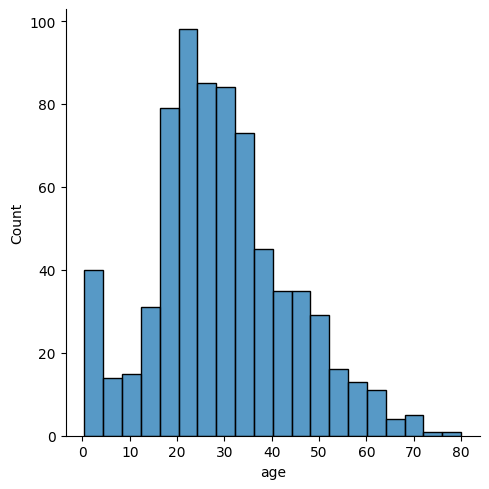

In [8]:
sns.displot(df['age'])

np.float64(0.38910778230082704)

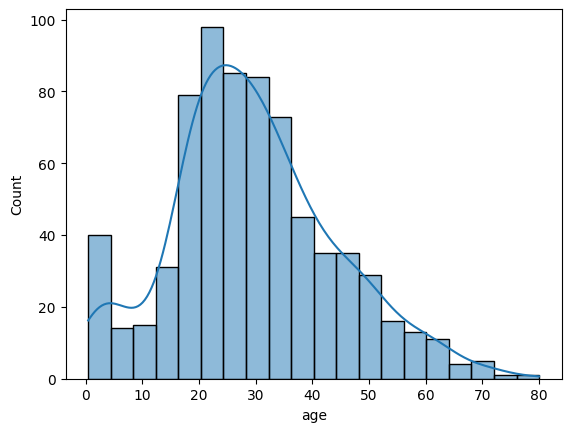

In [ ]:
sns.histplot(df['age'],kde=True)

In [22]:
df['age'].skew()
#since the value is 0.30 we can use mean value imputation
df['age_mean']=df['age'].fillna(df['age'].mean())
df[['age','age_mean']]

,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


#Mode Imputation techinques

In [6]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [12]:
print(df['embarked'].mode())
df['embarked_mode']=df['embarked'].fillna(df['embarked'].mode()[0])
df[['embarked','embarked_mode']]


0    S
Name: embarked, dtype: object


,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C
